In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

#### [LINK Geron](https://github.com/Andrew-Ng-s-number-one-fan/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/Notebooks/C10_N1_Implementing%20MLP%20and%20Fine-Tuning%20NN%20Hyperparameters.ipynb)

In [2]:
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:, (2, 3)] # Comprimento e largura
X.shape

(150, 2)

In [5]:
y = (iris.target == 0).astype(np.int)
y.shape

C:\Users\gabri\AppData\Local\Temp\ipykernel_113956\3168327486.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


(150,)

In [6]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [7]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [8]:
X = iris.data[:,:]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Criando uma MLP com saida Softmax

In [10]:
model = keras.models.Sequential([
            keras.layers.Dense(4, activation="elu", input_shape=[4]),
            keras.layers.Dense(100, activation="elu"),
            keras.layers.Dense(100, activation="elu"),
            keras.layers.Dense(3, activation="softmax"),
        ])

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
model.get_weights()

[array([[-0.8316881 ,  0.06110507, -0.09353948,  0.4464429 ],
        [-0.4242296 , -0.78983617,  0.5898929 , -0.23045051],
        [ 0.45929903, -0.6711301 ,  0.3090492 ,  0.41719824],
        [-0.5874392 ,  0.8262859 , -0.23729026, -0.6003159 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.20564696,  0.18075556,  0.12719306,  0.09201747,  0.17739138,
          0.20637158, -0.09109098,  0.10597488, -0.15556881,  0.10368755,
          0.00901073,  0.02768075,  0.18503368,  0.0557667 , -0.00938761,
         -0.04086499, -0.18196645, -0.01867728,  0.07378459,  0.10007071,
          0.22723436, -0.21003775, -0.12166373,  0.04109874,  0.16617784,
         -0.21298513,  0.20522326, -0.11524314, -0.08428848, -0.01943342,
          0.22140884,  0.07634902, -0.00314993,  0.1252557 ,  0.13235712,
          0.04938978, -0.18027113,  0.14114428, -0.09114645, -0.12903802,
          0.12617168, -0.11287484, -0.05640209, -0.07930797, -0.15640163,
          0.17595336,

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 100)               500       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 10,923
Trainable params: 10,923
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.predict(X[0].reshape(1, -1)).argmax()

1/1 [==============================] - 0s 215ms/step


0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
history_0 = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 1s 99ms/step - loss: 1.2750 - accuracy: 0.2952 - val_loss: 1.0782 - val_accuracy: 0.4222
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 1.1044 - accuracy: 0.3238 - val_loss: 1.0677 - val_accuracy: 0.4667
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0607 - accuracy: 0.4571 - val_loss: 1.0837 - val_accuracy: 0.2889
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0477 - accuracy: 0.3524 - val_loss: 1.0804 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0413 - accuracy: 0.4000 - val_loss: 1.0678 - val_accuracy: 0.3111
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0358 - accuracy: 0.3524 - val_loss: 1.0501 - val_accuracy: 0.2889
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 1.0282 - accuracy: 0.3429 - val_loss: 1.0499 - val_accuracy: 0.2889
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 9ms/step - loss: 0.4496 - accuracy: 0.8667 - val_loss: 0.3737 - val_accuracy: 0.9111
Epoch 60/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4484 - accuracy: 0.8762 - val_loss: 0.3890 - val_accuracy: 0.7556
Epoch 61/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4595 - accuracy: 0.8190 - val_loss: 0.3717 - val_accuracy: 0.8889
Epoch 62/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4413 - accuracy: 0.8476 - val_loss: 0.3615 - val_accuracy: 0.9111
Epoch 63/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4323 - accuracy: 0.9048 - val_loss: 0.3577 - val_accuracy: 0.8889
Epoch 64/100
4/4 [==============================] - 0s 12ms/step - loss: 0.4330 - accuracy: 0.8857 - val_loss: 0.3526 - val_accuracy: 0.9111
Epoch 65/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4269 - accuracy: 0.8571 - val_loss: 0.3483 - val_accuracy: 0.9111
Epoch 66/100
4/4 [=========

In [17]:
X_train[:5], y_train[:5]

(array([[5.5, 2.4, 3.7, 1. ],
        [6.3, 2.8, 5.1, 1.5],
        [6.4, 3.1, 5.5, 1.8],
        [6.6, 3. , 4.4, 1.4],
        [7.2, 3.6, 6.1, 2.5]]),
 array([1, 2, 2, 1, 2]))

In [18]:
pred = [model.predict(instance.reshape(1, -1)).argmax() for instance in X_train[:5]]
pred

1/1 [==============================] - 0s 26ms/step


[1, 2, 2, 2, 2]

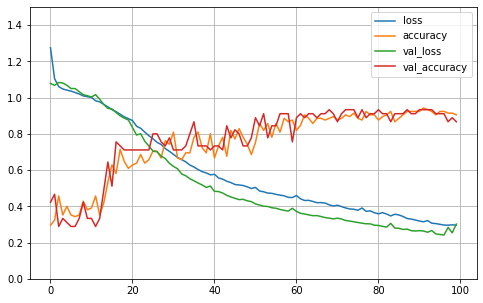

In [19]:
df_history_0 = pd.DataFrame(history_0.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

## Usando MLP

In [20]:
fashion_mnist = keras.datasets.fashion_mnist

In [21]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [22]:
X_train_full.shape

(60000, 28, 28)

In [23]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [25]:
class_names[y_train[0]]

'Coat'

## Criando o modelo usando a sequential API

In [26]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[28, 28]),
            keras.layers.Dense(300, activation="relu"),
            keras.layers.Dense(100, activation="relu"),
            keras.layers.Dense(10, activation="softmax"),
        ])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


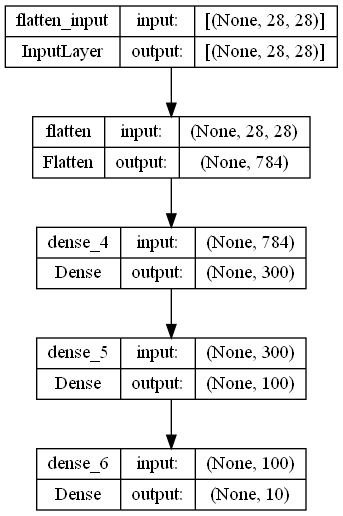

In [28]:
## Visualizando o modelo por imagens
keras.utils.plot_model(model, to_file='graph.png', show_shapes=True)

In [29]:
# !pip install graphviz

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7197 - accuracy: 0.7665 - val_loss: 0.4949 - val_accuracy: 0.8394
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4844 - accuracy: 0.8319 - val_loss: 0.4568 - val_accuracy: 0.8334
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4416 - accuracy: 0.8454 - val_loss: 0.4074 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4139 - accuracy: 0.8540 - val_loss: 0.3891 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8614 - val_loss: 0.4203 - val_accuracy: 0.8488
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3780 - accuracy: 0.8668 - val_loss: 0.3950 - val_accuracy: 0.8572
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8711 - val_loss: 0.3666 - val_accuracy:

## Curvas de aprendizado

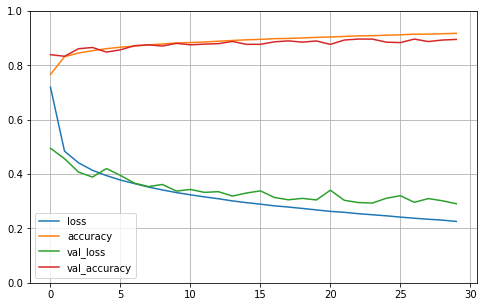

In [32]:
df_history = pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Usando o modelo para fazer predições

In [33]:
X_new = X_test[:3]
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [34]:
y_proba = model.predict(X_new)
y_proba.round(2)
y_pred = np.array([instance.argmax() for instance in y_proba])
y_pred

1/1 [==============================] - 0s 109ms/step


array([9, 2, 1], dtype=int64)

In [35]:
def classes_by_numbers(numbers):
    return np.array([class_names[number] for number in numbers])

In [36]:
y_pred_classes = classes_by_numbers(y_pred)
y_pred_classes

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

## Construindo uma MLP de regressão usando a Sequential API

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
housing = fetch_california_housing()

In [39]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [40]:
scaler = StandardScaler()

In [41]:
X_train

array([[   3.024     ,   27.        ,    4.72553699, ...,    3.349642  ,
          33.97      , -117.35      ],
       [   2.7864    ,   22.        ,    4.85983264, ...,    2.72175732,
          34.38      , -119.53      ],
       [   1.5625    ,   36.        ,    5.20320856, ...,    3.27807487,
          35.34      , -119.01      ],
       ...,
       [   1.7083    ,   41.        ,    5.13924051, ...,    2.37341772,
          34.83      , -114.59      ],
       [   7.3267    ,   27.        ,    7.20803783, ...,    2.65642238,
          37.85      , -122.14      ],
       [   3.875     ,   20.        ,    5.838     , ...,    3.422     ,
          38.44      , -122.73      ]])

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_train

array([[-0.44467965, -0.13046029, -0.32657422, ...,  0.3687544 ,
        -0.78368244,  1.11240772],
       [-0.56980187, -0.52942877, -0.26219405, ..., -0.19559821,
        -0.59293524,  0.02693838],
       [-1.2143182 ,  0.58768298, -0.09758259, ...,  0.30442873,
        -0.14630764,  0.28585767],
       ...,
       [-1.13753866,  0.98665146, -0.12824832, ..., -0.50869131,
        -0.38357855,  2.48667165],
       [ 1.82115939, -0.13046029,  0.86351531, ..., -0.25432229,
         1.02143741, -1.27263729],
       [ 0.00346431, -0.68901616,  0.20673097, ...,  0.4337909 ,
         1.29592729, -1.5664111 ]])

In [44]:
X_valid = scaler.transform(X_valid)

In [45]:
X_test

array([[   3.0446    ,   32.        ,    4.89507495, ...,    3.72805139,
          32.72      , -117.08      ],
       [   3.8864    ,   36.        ,    5.4384058 , ...,    2.54710145,
          37.69      , -122.15      ],
       [   2.2381    ,   35.        ,    4.18081181, ...,    2.85608856,
          33.86      , -118.19      ],
       ...,
       [  15.0001    ,   37.        ,    9.33333333, ...,    2.78006873,
          34.09      , -118.41      ],
       [   7.3023    ,   35.        ,    6.66171004, ...,    2.61152416,
          37.43      , -122.11      ],
       [   5.2722    ,   17.        ,    5.53242321, ...,    3.50853242,
          37.44      , -121.88      ]])

In [46]:
X_test = scaler.transform(X_test)

In [47]:
X_test

array([[-0.43383152,  0.26850819, -0.24529919, ...,  0.70887469,
        -1.36522878,  1.24684658],
       [ 0.00946765,  0.58768298,  0.01516895, ..., -0.35258165,
         0.94699948, -1.27761651],
       [-0.85854139,  0.50788928, -0.58771079, ..., -0.07485919,
        -0.83485851,  0.69415348],
       ...,
       [ 5.86203823,  0.66747668,  1.88236369, ..., -0.14318701,
        -0.72785399,  0.5846107 ],
       [ 1.80831014,  0.50788928,  0.60161047, ..., -0.29467751,
         0.82603784, -1.25769964],
       [ 0.73924192, -0.92839725,  0.06024008, ...,  0.5115676 ,
         0.83069021, -1.14317765]])

In [48]:
X_train.shape[1:]

(8,)

In [49]:
# Criando o modelo
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7554 - val_loss: 0.5416
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4451 - val_loss: 0.4340
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4009 - val_loss: 0.6453
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3859 - val_loss: 0.5465
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3771 - val_loss: 0.4874
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3708 - val_loss: 0.4221
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3648 - val_loss: 0.3790
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3619 - val_loss: 0.3749
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3568 - val_loss: 0.4156
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3567 - val_loss: 0.4151

In [50]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 50ms/step


In [51]:
y_pred

array([[1.4219794],
       [2.2178483],
       [1.7281568]], dtype=float32)

In [52]:
y_test[:3]

array([1.019, 1.973, 1.375])

In [53]:
mse_test

0.40679019689559937

In [54]:
y_pred = model.predict(X_test)

162/162 [==============================] - 0s 1ms/step


In [55]:
y_pred

array([[1.4219794],
       [2.2178483],
       [1.7281568],
       ...,
       [5.852978 ],
       [4.2107463],
       [2.2406979]], dtype=float32)

In [56]:
y_test

array([1.019  , 1.973  , 1.375  , ..., 5.00001, 4.513  , 1.869  ])

## Construindo modelos complexos usando a functional API
Um bom exemplo de rede neural não sequencial é uma rede neural Wide and Deep. Essa aquitetura de rede neural foi apresentada em um artigo de 2016 de [Heng-Tze et al](https://arxiv.org/abs/1606.07792). Ela interliga todas ou parte das entradas diretamente à camada de saída, tal como a Figura 1 do paper. Essa arquitetura possibilita a rede neural aprender padrões profundos (por meio do caminho profundo) e regras simples (por meio de caminho curto). Em contrapartida, uma MLP normal força os dados a circularem por meio da pilha completa de camadas. Desse modo, padrões simples nos dados podem acabar sendo distorcidos. 

In [57]:
# Construiremos uma NN para lidar com os dados dos imóveis da Califórnia.
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 30)           930         ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_10[0][0]']           

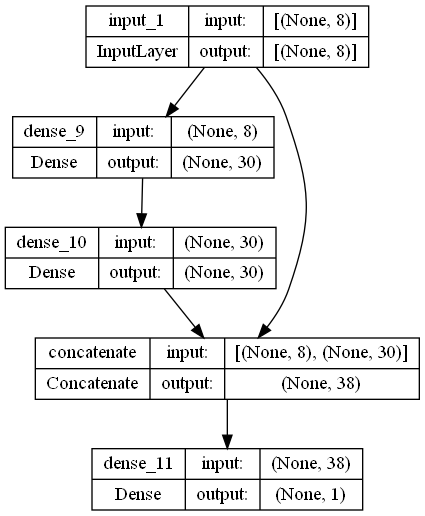

In [59]:
## Visualizando o modelo por imagens
keras.utils.plot_model(model, to_file='graph.png', show_shapes=True)

Nesse caso, basta compilar o modelo, treinar, avaliar e usar. 

In [60]:
#TODO

### Subconjuntos de características
Podemos dividir a entrada da NN como subconjuntos. Por exemplo, criar um conjunto A que será o primeiro input para o caminho amplo (direto conectado com a saída) e um conjunto B que será o segundo input para o caminho profundo (que passa pela pilha de camadas profundas)

In [61]:
# Input A, características de 0 a 4
input_A = keras.layers.Input(shape=[5], name="wide_input")
# Input B, características de 2 a 7
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [62]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 30)           930         ['dense_12[0][0]']               
                                                                                            

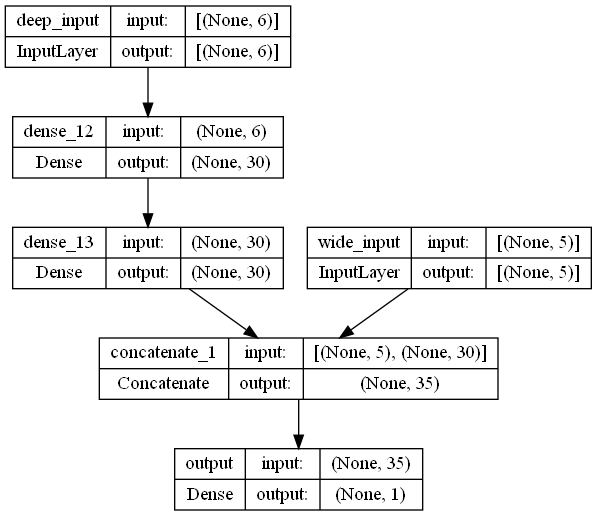

In [63]:
## Visualizando o modelo por imagens
keras.utils.plot_model(model, to_file='graph.png', show_shapes=True)

In [64]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [65]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [66]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9414 - val_loss: 1.9342
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6949 - val_loss: 0.7776
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5882 - val_loss: 0.6194
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5382 - val_loss: 0.5652
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5048 - val_loss: 0.5456
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4806 - val_loss: 0.5312
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4626 - val_loss: 0.5097
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4495 - val_loss: 0.5038
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4402 - val_loss: 0.4919
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4334 - val_loss: 0.5056

In [67]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 63ms/step


In [68]:
y_test[:3]

array([1.019, 1.973, 1.375])

In [69]:
y_pred

array([[1.3544712],
       [2.316864 ],
       [1.7453083]], dtype=float32)

In [70]:
mse_test

0.6598304510116577

### Múltiplas saída 

In [71]:
# Input A, características de 0 a 4
input_A = keras.layers.Input(shape=[5], name="wide_input")
# Input B, características de 2 a 7
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

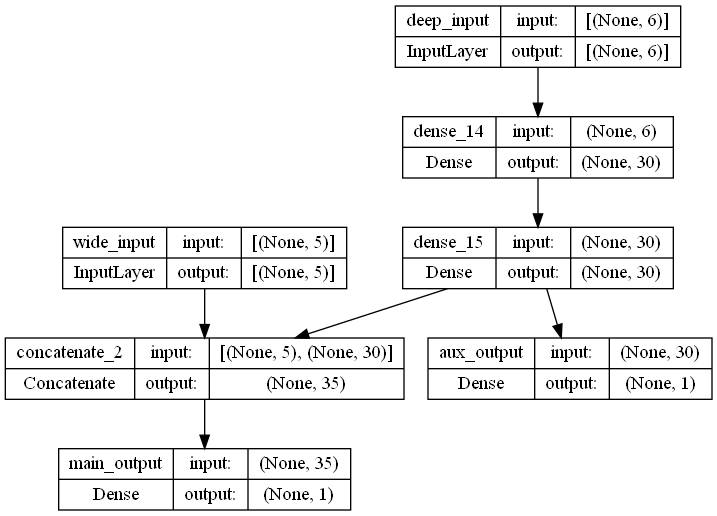

In [72]:
keras.utils.plot_model(model, to_file='graph.png', show_shapes=True)

In [73]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [74]:
history = model.fit((X_train_A, X_train_B), [y_train, y_train], epochs=20,
                   validation_data=((X_valid_A, X_valid_B), [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8065 - main_output_loss: 0.6926 - aux_output_loss: 1.8311 - val_loss: 0.8161 - val_main_output_loss: 0.5814 - val_aux_output_loss: 2.9284
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4791 - main_output_loss: 0.4324 - aux_output_loss: 0.8992 - val_loss: 0.6528 - val_main_output_loss: 0.5059 - val_aux_output_loss: 1.9755
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4470 - main_output_loss: 0.4156 - aux_output_loss: 0.7292 - val_loss: 0.5813 - val_main_output_loss: 0.4682 - val_aux_output_loss: 1.5994
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4345 - main_output_loss: 0.4111 - aux_output_loss: 0.6458 - val_loss: 0.5769 - val_main_output_loss: 0.4863 - val_aux_output_loss: 1.3914
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4216 - main_output_loss: 0.4013 - aux_output_loss: 0.6044 - val_loss

In [75]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.4404 - main_output_loss: 0.3786 - aux_output_loss: 0.9973


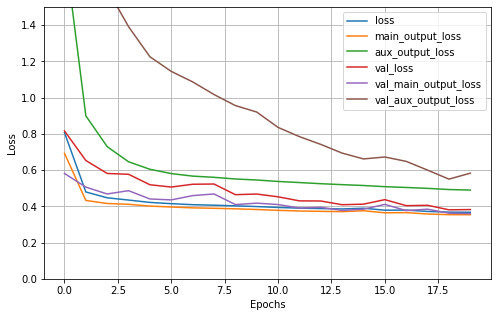

In [76]:
df_history = pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.gca().set_ylim(0, 1.5)
plt.show()

In [77]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 82ms/step


In [78]:
y_pred_main, y_pred_aux

(array([[1.338455 ],
        [2.3459325],
        [1.6334033]], dtype=float32),
 array([[1.3751428],
        [2.4032319],
        [1.8448821]], dtype=float32))

In [79]:
y_test

array([1.019  , 1.973  , 1.375  , ..., 5.00001, 4.513  , 1.869  ])

## Usando Subclassing API para construir modelos dinâmicos
Até então as API's Sequential e Functional são estáticas. Ou seja, uma vez criada a pilha de camadas e definida a maneira como elas vão estar dispostas, elas são levadas daquela forma até o fim. Dessa forma, a Subclassing irá trazer uma maneira mais dinâmica de construir as camadas. Vamos subclassear a classe Model.

In [80]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # Lida com os argumentos padrões
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [81]:
model = WideAndDeepModel()

In [82]:
model

Esse tipo de flexibilidade pode ajudar a utilizar operações de mais baixo nível do Tensorflow. Porém, é melhor utiliza-lo somente quando necessário. Alguns métodos do Keras Model não vão poder ser utilizados e isso pode contribuir para que erros ocorram.

## Salvando e armazenando um modelo

In [83]:
import os

In [84]:
# Criando o modelo
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6899 - val_loss: 0.4869
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4327 - val_loss: 0.5870
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4080 - val_loss: 0.5925
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3931 - val_loss: 0.4242
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3830 - val_loss: 0.4478
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3755 - val_loss: 0.3778
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3703 - val_loss: 0.3844
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3662 - val_loss: 0.3778
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3606 - val_loss: 0.4053
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3588 - val_loss: 0.3638

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 30)                270       
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [86]:
path_save_model = os.path.join("Training", "Save Models", "my_keras_model.h5")

In [87]:
path_save_model

'Training\\Save Models\\my_keras_model.h5'

In [88]:
# Salvando modelo para o path criado acima
model.save(path_save_model)

In [89]:
# Carregando modelo para o path criado acima
model = keras.models.load_model(path_save_model)

In [90]:
model

## Usando funções de callback
Para evitar que o um problema de perder os dados de treinamento durante o processo (caso computador trave, por exemplo), é possível utilizar funções de callback para salvar os parâmetros a cada fim de epoch.

In [91]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(path_save_model)

In [92]:
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3389
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3381
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3372
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3361
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3338
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3335
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3327
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3322
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3337
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3316


In [93]:
'''
Para ter o melhor modelo no conjunto de validação, podemos ativar o argumento save_best_only=True
'''
checkpoint_cb = keras.callbacks.ModelCheckpoint(path_save_model, save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model(path_save_model)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3275 - val_loss: 0.3559
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3281 - val_loss: 0.3956
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3270 - val_loss: 0.4185
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3272 - val_loss: 0.3576
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3276 - val_loss: 0.3376
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3281 - val_loss: 0.3803
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3265 - val_loss: 0.3469
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3265 - val_loss: 0.3375
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3226 - val_loss: 0.3528
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3227 - val_loss: 0.3781

In [94]:
'''
Para implementar a early_stopping basta utilizar a callback EarlyStopping. Ela irá interromper o treinamento quando 
não calcular nenhum progresso na validação definida para várias épocas (definida pelo argumento patience). 
'''
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3270 - val_loss: 0.3453
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3258 - val_loss: 0.4182
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3231 - val_loss: 0.3454
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3289 - val_loss: 0.3978
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3203 - val_loss: 0.4897
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3196 - val_loss: 0.3895
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3219 - val_loss: 0.4458
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3193 - val_loss: 0.3622
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3176 - val_loss: 0.6410
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3244 - val_lo

## Usando TensorBoard

In [95]:
root_logdir = os.path.join(os.curdir, "Training", "my_logs")

In [96]:
root_logdir

'.\\Training\\my_logs'

In [97]:
def get_run_logdir():
    import time 
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [98]:
run_logdir = get_run_logdir()

In [99]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3116 - val_loss: 0.3322
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3118 - val_loss: 0.4707
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3109 - val_loss: 0.4587
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3115 - val_loss: 0.3641
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3148 - val_loss: 0.6026
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3127 - val_loss: 0.4206
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3102 - val_loss: 0.3759
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3091 - val_loss: 0.4763
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3110 - val_loss: 0.5739
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3081 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.2919 - val_loss: 0.4072
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2923 - val_loss: 0.3963
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2916 - val_loss: 0.5169
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3003 - val_loss: 0.3807
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2909 - val_loss: 0.3399
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2908 - val_loss: 0.3242
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2917 - val_loss: 0.3851
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2927 - val_loss: 0.3455
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2929 - val_loss: 1.0842
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.2926 - val_loss: 

## Curriculum Learning Utilizando API Functional

Quando utilizamos o curriculum learning, tratamos de casos mais simples primeiro para então alcançar um objetivo de uma task mais complexa. A utilização de uma rede neural de múltiplas pilhas trará algum benefício ao mudar de task?

In [ ]:
# Construiremos uma NN para lidar com os dados dos imóveis da Califórnia.
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1_stack1 = keras.layers.Dense(30, activation='relu')(input_)
hidden1_stack2 = keras.layers.Dense(30, activation='relu')(input_)
hidden2_stack1 = keras.layers.Dense(30, activation='relu')(hidden1_stack1)
hidden2_stack2 = keras.layers.Dense(30, activation='relu')(hidden1_stack2)
concat = keras.layers.Concatenate()([hidden2_stack1, hidden2_stack2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()

In [ ]:
## Visualizando o modelo por imagens
keras.utils.plot_model(model, to_file='graph.png', show_shapes=True)